# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** NAUFAL TRI SUBAKTI
- **Email:** naufaltrisubakti@mail.ugm.ac.id
- **ID Dicoding:** NAUFAL TRI SUBAKTI

## Menentukan Pertanyaan Bisnis

- Adakah Variasi dalam Jumlah Penyewaan Sepeda di Masing-Masing Musim?
- Sejauh Mana Hari dalam Seminggu Mempengaruhi Jumlah Penyewaan Sepeda?
- Apa Dampak Suhu Terhadap Jumlah Penyewaan Sepeda?


## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

**Insight:**
- langkah pertama, melakukan mount drive
- menampilkan setiap dataframe yang ada pada Bike Sharing Dataset dan menampilkan jumlah data dari setiap dataframe
- menggabungkan kedua dataframe menjadi satu tabel

In [9]:
day_df = pd.read_csv('Bike Sharing Dataset/day.csv')

In [12]:
# Day DataFrame

day_df = pd.read_csv('Bike Sharing Dataset/day.csv')


day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Hour DataFrame

hour_df = pd.read_csvday_df = pd.read_csv('Bike Sharing Dataset/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
# menghitung jumlah baris setiap dataframe
print("Jumlah baris di DataFrame hari:", day_df.shape[0])
print("Jumlah baris di DataFrame jam:", hour_df.shape[0])

Jumlah baris di DataFrame hari: 731
Jumlah baris di DataFrame jam: 17379


In [15]:
# menggabungkan kedua dataframe menjadi satu tabel
bike_sharing_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_day', '_hour'))
print(bike_sharing_df.shape)
# df_product.head()
bike_sharing_df.loc[bike_sharing_df["dteday"].isnull()]
bike_sharing_df.head()

(17379, 32)


,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Insight:**
- langkah pertama dapat mengakses informasi dari setiap dataframe terlebih dahulu
- melakukan pengecekan missing value serta duplikasi data dari setiap dataframe

In [16]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam day dataframe

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [18]:
# memeriksa tipe data dari tiap kolom yang terdapat dalam hour dataframe

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
# pengecekan missing value dari setiap dataframe

print("Jumlah missing values Day Dataframe:\n", day_df.isna().sum())
print("Jumlah missing values Hour Dataframe:\n", hour_df.isna().sum())


Jumlah missing values Day Dataframe:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah missing values Hour Dataframe:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [20]:
print("Jumlah duplikasi Day Dataframe:\n", day_df.duplicated().sum())
print("Jumlah duplikasi Hour Dataframe:\n", hour_df.duplicated().sum())

Jumlah duplikasi Day Dataframe:
 0
Jumlah duplikasi Hour Dataframe:
 0


### Cleaning Data

**Insight:**
- setelah melakukan proses assessing data, tidak ditemukan adanya kesalahan baik dari missing value ataupun duplicate data, jadi tidak perlu melakukan cleaning data

## Exploratory Data Analysis (EDA)

**Insight:**
- xxx
- xxx

In [21]:
# eksplorasi data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [22]:
#  eksplorasi data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [24]:
# Mengelompokkan data penyewaan sepeda berdasarkan hari libur dan hari kerja, lalu menghitung agregasi
analisis_hari_libur_kerja = bike_sharing_df.groupby(by=["holiday_day", "workingday_day"]).agg({
    "instant_day": "nunique",  
    "cnt_hour": "sum",         
    "casual_hour": "sum",     
    "registered_hour": "sum"   
}).sort_values(by=["holiday_day", "workingday_day", "cnt_hour"], ascending=[True, True, False])

# Menampilkan hasil analisis
print("Hasil Analisis Penyewaan Sepeda Berdasarkan Hari Libur dan Hari Kerja:")
print(analisis_hari_libur_kerja)



Hasil Analisis Penyewaan Sepeda Berdasarkan Hari Libur dan Hari Kerja:
                            instant_day  cnt_hour  casual_hour  \
holiday_day workingday_day                                       
0           0                       210    921834       294373   
            1                       500   2292410       303285   
1           0                        21     78435        22359   

                            registered_hour  
holiday_day workingday_day                   
0           0                        627461  
            1                       1989125  
1           0                         56076  


In [25]:
# Mengakses informasi penyewaan sepeda berdasarkan musim
season_analysis = bike_sharing_df.groupby(by="season_day").agg({
    "instant_day": "nunique",
    "cnt_hour": "sum",
    "casual_hour": "sum",
    "registered_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)

print("Hasil Analisis Penyewaan Sepeda Berdasarkan Musim:")
print(season_analysis)


Hasil Analisis Penyewaan Sepeda Berdasarkan Musim:
            instant_day  cnt_hour  casual_hour  registered_hour
season_day                                                     
3                   188   1061129       226091           835038
2                   184    918589       203522           715067
4                   178    841613       129782           711831
1                   181    471348        60622           410726


In [26]:
# Mengakses informasi penyewaan sepeda berdasarkan kondisi cuaca
weather_analysis = bike_sharing_df.groupby(by="weathersit_day").agg({
    "instant_day": "nunique",
    "cnt_hour": "sum",
    "casual_hour": "sum",
    "registered_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)

print("Hasil Analisis Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
print(weather_analysis)


Analisis Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
                instant_day  cnt_hour  casual_hour  registered_hour
weathersit_day                                                     
1                       463   2257952       446346          1811606
2                       247    996858       169776           827082
3                        21     37869         3895            33974


In [144]:
# Mengakses informasi penyewaan sepeda berdasarkan suhu dan mengelompokkan suhu menjadi kategori
bike_sharing_df['temp_category'] = pd.cut(bike_sharing_df['temp_day'], bins=[-1, 0.2, 0.3, 0.4, 0.5, 1], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

temp_analysis = bike_sharing_df.groupby(by="temp_category").agg({
    "instant_day": "nunique",
    "cnt_hour": "sum",
    "casual_hour": "sum",
    "registered_hour": "sum"
}).sort_values(by="cnt_hour", ascending=False)

print("Hasil Analisis Penyewaan Sepeda Berdasarkan Suhu:")
print(temp_analysis)


Analisis Penyewaan Sepeda Berdasarkan Suhu:
               instant_day  cnt_hour  casual_hour  registered_hour
temp_category                                                     
Very High              364   2042809       434022          1608787
High                   106    475870        88231           387639
Medium                 126    452536        66684           385852
Low                    101    268994        27642           241352
Very Low                34     52470         3438            49032


<ipython-input-144-b343be5a3150>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = bike_sharing_df.groupby(by="temp_category").agg({


## Visualization & Explanatory Analysis

**Insight:**
- melakukan visualisasi data untuk memudahkan untuk mendapatkan informasi jelas terkait jawaban dari pertanyaan-pertanyaan yang sudah ditetapkan diawal

### Pertanyaan 1: Adakah Variasi dalam Jumlah Penyewaan Sepeda di Masing-Masing Musim?

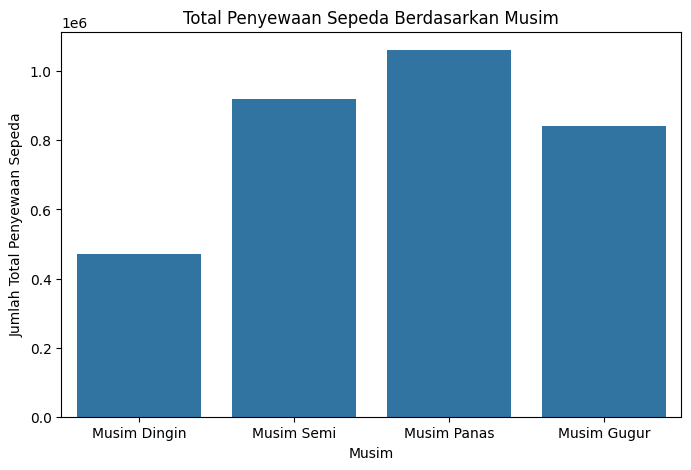

In [27]:
# Menghitung jumlah total penyewaan sepeda untuk setiap musim
analisis_musim = bike_sharing_df.groupby("season_day")["cnt_hour"].sum().reset_index()

# Membuat visualisasi data
plt.figure(figsize=(8, 5))  
sns.barplot(x='season_day', y='cnt_hour', data=analisis_musim)  
plt.title('Total Penyewaan Sepeda Berdasarkan Musim') 
plt.ylabel('Jumlah Total Penyewaan Sepeda')  
plt.xlabel('Musim')  
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])  
plt.show()  


### Pertanyaan 2: Sejauh Mana Hari dalam Seminggu Mempengaruhi Jumlah Penyewaan Sepeda?

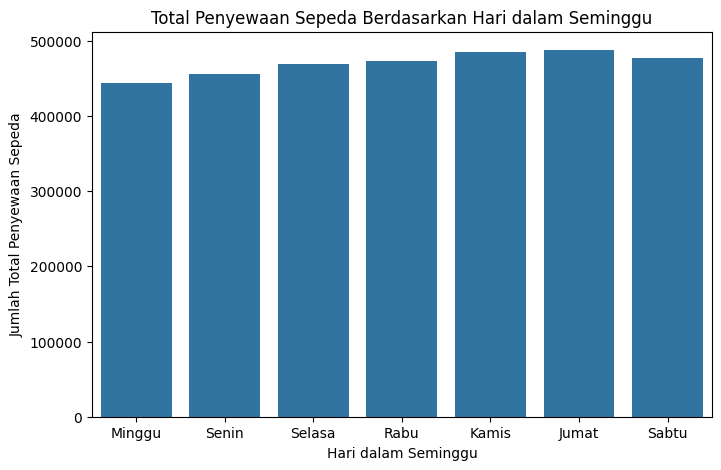

In [28]:
# Menghitung jumlah total penyewaan sepeda berdasarkan hari dalam seminggu
analisis_hari = bike_sharing_df.groupby("weekday_day")["cnt_hour"].sum().reset_index()

# Membuat visualisasi data
plt.figure(figsize=(8, 5))  # Mengatur ukuran tampilan grafik
sns.barplot(x='weekday_day', y='cnt_hour', data=analisis_hari)  
plt.title('Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu') 
plt.ylabel('Jumlah Total Penyewaan Sepeda') 
plt.xlabel('Hari dalam Seminggu')  
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])  
plt.show()  # Menampilkan grafik


## Pertanyaan 3: Apa Dampak Suhu Terhadap Jumlah Penyewaan Sepeda?

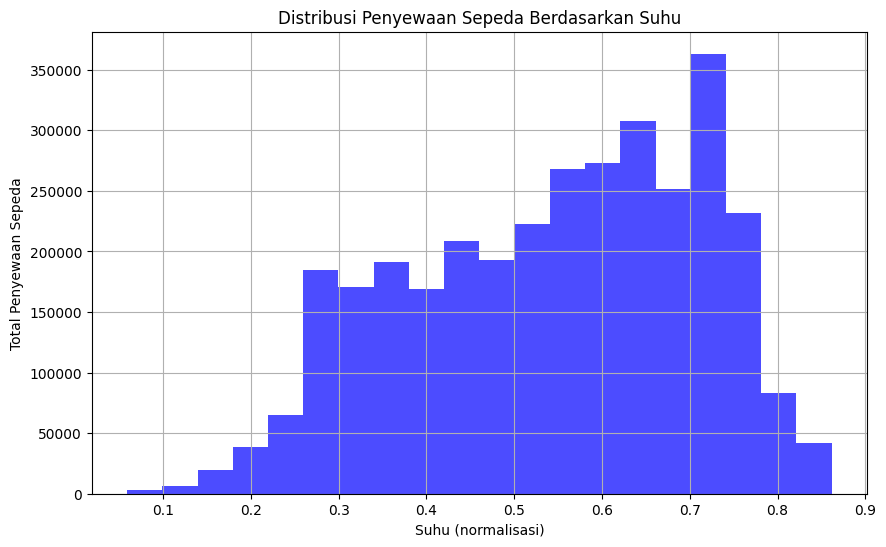

In [29]:
# Menghitung total penyewaan sepeda berdasarkan suhu
analisis_suhu = bike_sharing_df.groupby("temp_day")["cnt_hour"].sum()

# Membuat visualisasi histogram
plt.figure(figsize=(10, 6))  # Mengatur ukuran tampilan grafik
plt.hist(analisis_suhu.index, bins=20, weights=analisis_suhu.values, alpha=0.7, color='blue')  
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Suhu')  
plt.xlabel('Suhu (normalisasi)') 
plt.ylabel('Total Penyewaan Sepeda')  
plt.grid()  
plt.show()  


## Conclusion

- Conclution pertanyaan 1

  Analisis mengungkapkan adanya perbedaan yang jelas dalam jumlah penyewaan sepeda pada berbagai musim. Musim-musim tertentu, seperti musim panas, biasanya memiliki angka penyewaan yang lebih tinggi dibandingkan musim dingin. Kemungkinan besar, hal ini dipengaruhi oleh kondisi cuaca yang lebih mendukung serta peningkatan aktivitas luar ruangan yang dilakukan oleh pengguna sepeda saat suhu lebih hangat..


- Conclution pertanyaan 2

  Hasil analisis menunjukkan bahwa hari dalam seminggu secara signifikan memengaruhi jumlah penyewaan sepeda. Umumnya, jumlah penyewaan lebih tinggi pada akhir pekan (Sabtu dan Minggu) dibandingkan dengan hari-hari kerja. Ini mengindikasikan bahwa banyak orang lebih memilih menggunakan sepeda untuk rekreasi atau kegiatan luar ruangan saat akhir pekan, sementara di hari-hari kerja, penggunaan sepeda cenderung menurun karena kesibukan rutin seperti bekerja atau bersekolah.

- Conclution pertanyaan 3

  Analisis keterkaitan antara suhu dan jumlah penyewaan sepeda mengungkapkan bahwa kenaikan suhu berhubungan positif dengan peningkatan penyewaan. Semakin tinggi suhu, semakin banyak pengguna yang menyewa sepeda, menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda, baik untuk transportasi maupun rekreasi. Sebaliknya, ketika suhu menurun, jumlah penyewaan sepeda cenderung berkurang.